<a href="https://colab.research.google.com/github/losvaldote/Python_Club_for_Physicist/blob/main/Copia_de_PCP_Sesi%C3%B3n_7_editado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

##Autor: [Ricardo Quispe M.](https://github.com/RcrdPhysics)
##Institución: Universidad Nacional Mayor de San Marcos
##Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

## Modificado por Luis Osvaldo Téllez Tovar

# <center> Sesión 7. Monte Carlo
<p align="center">
  <img src="https://www.researchgate.net/profile/Viveca-Lindahl/publication/323557242/figure/fig6/AS:631580842262590@1527592015983/The-basic-principle-of-the-Monte-Carlo-hit-and-miss-method_Q320.jpg"  width=30% />
</p>

## Outline

1. Calculando Pi
2. Integración con Monte Carlo
3. EDOs con Monte Carlo
4. Problema Físico





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.integrate
%matplotlib inline

## 1.  Calculando Pi



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Monte-Carlo01.gif"  width=35% />
</p>

Sabemos que la ecuación de la circunferencia es:

$$x^2+y^2=1$$

Por lo que con esto podemos delimitar qué puntos están dentro de la circunferencia.

Es decir:


| Condición para (x,y)      |      Resultado             |
|-----------------|----------------------------|
| $x^2+y^2 \leq 1$     |  El punto está dentro      | 
| $x^2+y^2 \gt 1$ |  El punto está afuera      |




In [ ]:
num_points=50000 #número de puntos a generar
points = [] #lista de las características puntos 
hits = 0. #Aciertos
random.seed(4) #Fija los números aleatorios generados
for _ in range(num_points): #for loop implícito
    x, y = random.random(), random.random() #generar número aleatorios homogéneos del 0 al 1
    if x*x + y*y <= 1.0: #Si los datos cumplen con la ec. de la circunferencia, entonces los puntos están dentro
        hits += 1 #contador de puntos que están dentro
        points.append((x, y, "red")) #almacenamiento de características
    else:
        points.append((x, y, "blue")) #almacenamiento de características

In [ ]:
type(points)

list

In [ ]:
#points

Utilice "zip(*data)" para descomprimir los argumentos de una lista o tupla: 

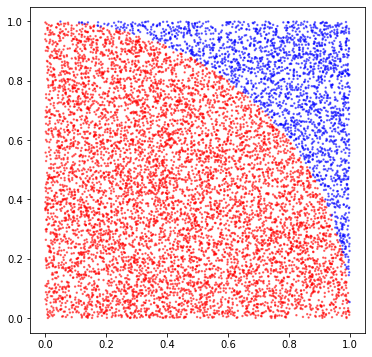

In [ ]:
x, y, colors = zip(*points) #descomprimiento y accediendo a las columnas de la lista "points"

fig, ax = plt.subplots() #crea el entorno gráfico
fig.set_size_inches(6.0, 6.0) #Define las dimensiones del gráfico
ax.scatter(x, y, s=2,c=colors, alpha=0.5) #Graficando los puntos

Sabemos que:

*   Área del cuadrado: $S = (2 r)^2$
*   Área del círculo: $C = \pi r^2$

Por lo que vemos que la proporción de las áreas nos brinda el valor de pi: 

$$C/S = \frac{\pi r^2}{4 r^2} = \frac{\pi}{4}$$

$$\pi = 4 \frac{C}{S}$$

In [ ]:
fraction = hits / num_points
4. * fraction

3.14056

### Analizando la convergencia

In [ ]:
iterations=1000 #número de iteraciones para la actualización de puntos
puntos=0
#creando las listas
points_l=[] 
pi_l=[]
random.seed(70)
for j in range(iterations):
  puntos += 100 # actualizador de puntos
  points = []
  hits = 0.
  random.seed(70)
  for _ in range(puntos):
    x, y = random.random(), random.random()

    if x*x + y*y < 1.0:
        hits += 1.
        points.append((x, y, "red" ))
    else:
        points.append((x, y, "blue"))
  fraction = hits / puntos
  pi=4. * fraction
  points_l.append(puntos) #lista de puntos creados
  pi_l.append(pi) #lista de valores

In [ ]:
random.random()

In [ ]:
#val=random.random()
#print(val,round(val,2))

In [ ]:
hits

78607.0

In [ ]:
puntos

100000

In [ ]:
len(points_l)

1000

In [ ]:
len(pi_l)

1000

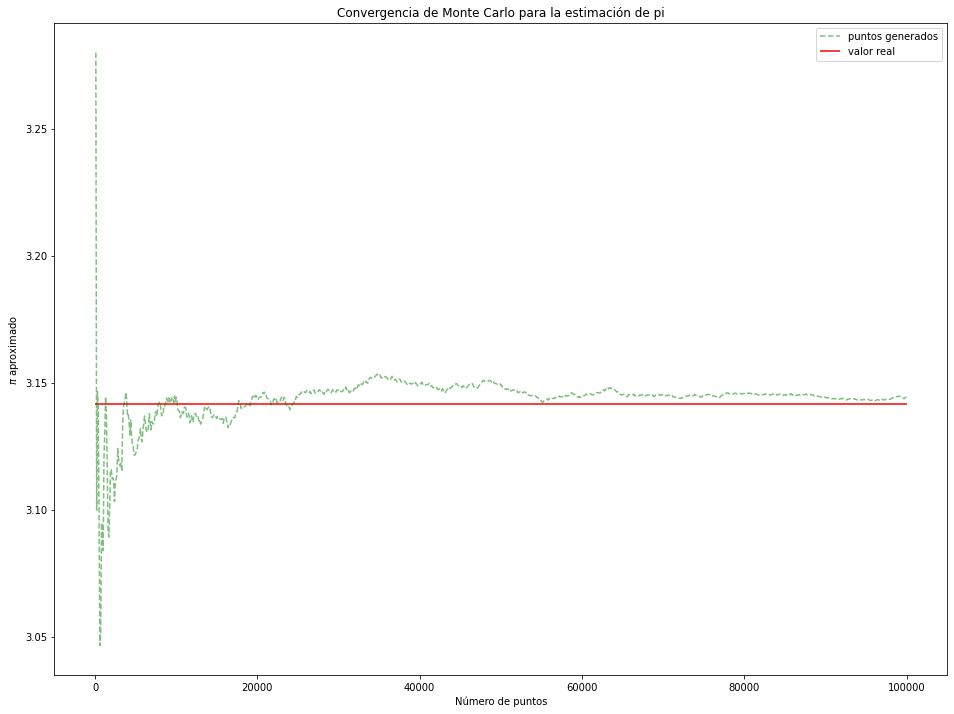

In [ ]:
plt.rcParams["figure.figsize"] = (16,12) #Re-dimensionalizar el plot por defecto de plt
plt.plot(points_l,pi_l,'g--',alpha=0.5, label="puntos generados") #graficamos los puntos
plt.hlines(np.pi,0,100000,'r', label="valor real") #línea horizontal
plt.title("Convergencia de Monte Carlo para la estimación de pi")
plt.xlabel("Número de puntos")
plt.ylabel("$\pi$ aproximado")

plt.legend()

In [ ]:
np.mean(pi_l)

3.14367570024395

##2. Integración con Monte Carlo

$$mean= \frac{\sum_i^n x_i}{N}$$

Para obtener el promedio de una función, $ <f (x)> $ sobre un intervalo $ [a, b] $, integramos $ f (x) P (x) $ sobre $ [a, b] $, <br /> donde P (x) es la función de distribución de probabilidad, $ P (x) = \frac{1}{b-a} $:

$ <f(x)> = \frac{1}{b-a} \int_{a}^{b} f (x) dx. $

Entonces podemos definir la integral de $ f (x) $ sobre el intervalo $ [a, b] $ en términos de su promedio $ <f (x)> $:

$$\int_{a}^{b}f(x)dx = (b-a)<f(x)>.$$

Al evaluar el promedio $ <f (x)> $ durante el intervalo $ [a, b] $, podemos usar un muestreo aleatorio para aproximarlo:

$$<f(x)> \sim \frac{1}{K}\sum_{i=1}^{K}f(x_{i})$$, 

donde $ x_{i} $ es un número elegido al azar dentro de el intervalo $ [a, b] $ y $ K $ es el número de muestras. <br/> <br/>
Básicamente, elegimos aleatoriamente $ K $ números dentro del intervalo $ [a, b] $ y evaluamos la función con esos números, <br/> luego tomamos el promedio para aproximar el promedio de $ f (x) $ durante el intervalo $ [a, b] $ para aproximar la integral:

$$\int_{a}^{b}f(x)dx \sim (b-a)\frac{1}{K}\sum_{i=1}^{K}f(x_{i})$$


Para obtener una mejor aproximación de la
integral, podemos dividir el intervalo $ [a, b] $ en subintervalos (intervalos más pequeños) y considerar más muestras. <br/>
Por lo tanto, la convergencia es solo una cuestión de tamaño de muestra, lo que hace que Monte Carlo sea más útil para integrales.
de funciones multivalor y ecuaciones diferenciales parciales. 

Como ejemplo, resolvemos numéricamente para

$$\int_{0}^{\pi}x^{2}\cos(x)dx$$ 

(La respuesta es $-2\pi$)


In [ ]:
#random.uniform(2,3)

2.8148279530408207

In [ ]:
#límites de integración
a = 0 
b = np.pi
n = 100 #número de subintervalos del intervalo [a, b]
N = 100 #número de muestras
x = np.zeros(n+1) #valores de x
h = (b-a)/n #tamaño del paso

def f(x):
  return((x**2)*np.cos(x))  #integrando

total = 0 #área inicial 
random.seed(55) #fijación de números aleatorios
for i in range(n):
    x[i+1] = x[i] + h #actualizando el valor de x
    f_mean = 0 #initialización
    for k in range(N): 
        x_k = random.uniform(x[i],x[i+1]) #número aleatorio dentro del subintervalo #[x,x+h]
        f_mean += f(x_k) #actualización  | reemplazando el valor generado en la función
    sub_area = (h/N)*f_mean #promedio para el sub-intervalo
    total += sub_area #promedio del intervalo

print(total)    

-6.283151436300419


In [ ]:
-2*np.pi

-6.283185307179586

In [ ]:
x

array([0.        , 0.03141593, 0.06283185, 0.09424778, 0.12566371,
       0.15707963, 0.18849556, 0.21991149, 0.25132741, 0.28274334,
       0.31415927, 0.34557519, 0.37699112, 0.40840704, 0.43982297,
       0.4712389 , 0.50265482, 0.53407075, 0.56548668, 0.5969026 ,
       0.62831853, 0.65973446, 0.69115038, 0.72256631, 0.75398224,
       0.78539816, 0.81681409, 0.84823002, 0.87964594, 0.91106187,
       0.9424778 , 0.97389372, 1.00530965, 1.03672558, 1.0681415 ,
       1.09955743, 1.13097336, 1.16238928, 1.19380521, 1.22522113,
       1.25663706, 1.28805299, 1.31946891, 1.35088484, 1.38230077,
       1.41371669, 1.44513262, 1.47654855, 1.50796447, 1.5393804 ,
       1.57079633, 1.60221225, 1.63362818, 1.66504411, 1.69646003,
       1.72787596, 1.75929189, 1.79070781, 1.82212374, 1.85353967,
       1.88495559, 1.91637152, 1.94778745, 1.97920337, 2.0106193 ,
       2.04203522, 2.07345115, 2.10486708, 2.136283  , 2.16769893,
       2.19911486, 2.23053078, 2.26194671, 2.29336264, 2.32477

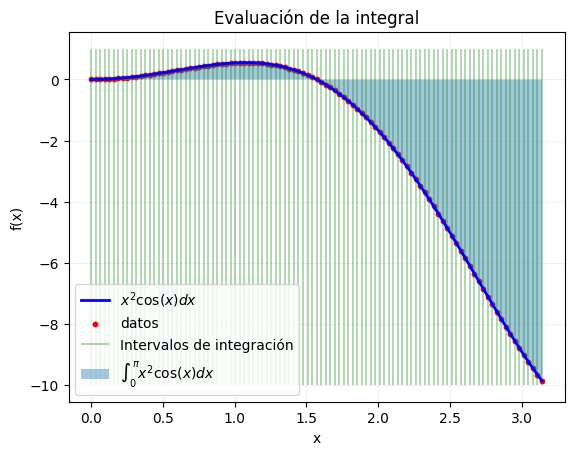

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.plot(x,f(x),'b', linewidth=2, label="$x^{2}\cos(x)dx$")
plt.scatter(x,f(x),s=10,c='r',label="datos")
plt.vlines(x,-10,1,'g',alpha=0.3, label="Intervalos de integración")
plt.fill_between(x,f(x),alpha=0.4, label= "$\int_{0}^{\pi}x^{2}\cos(x)dx$")
plt.title("Evaluación de la integral")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(alpha=0.2)

Si calculamos para la integral aproximada 500 veces, el promedio tenderá al valor real, $ -2 \ pi $

Text(0.5, 1.0, 'Distribución de aproximaciones')

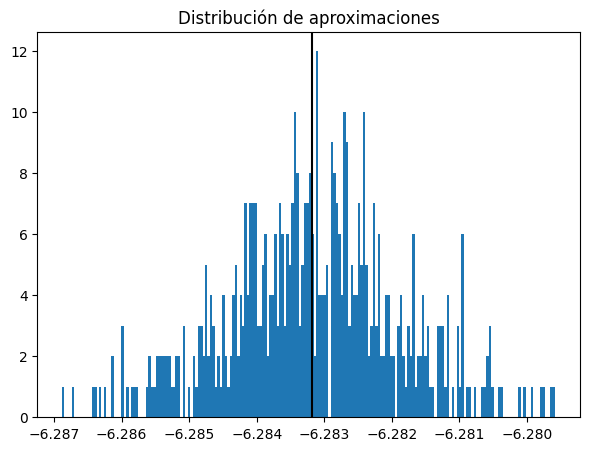

In [ ]:
K = 500 # número de iteraciones o pruebas 
intrl = np.zeros(K) #array de ceros dimensión K 
for j in range(K):    
    total = 0
    for i in range(n):
        x[i+1] = x[i] + h
        f_mean = 0 #initialization
        for k in range(N):
            x_k = random.uniform(x[i],x[i+1]) #random number within the subinterval
            f_mean = f(x_k) + f_mean 
        sub_area = (h/N)*f_mean
        total = sub_area + total
    intrl[j] = total #alamacenando las aproximaciones de las áreas totales en el array itrl
plt.figure(figsize = (7,5))
plt.hist(intrl, bins = 100) #plot del histograma
plt.axvline(x=-2*np.pi,color = 'black')
plt.title("Distribución de aproximaciones")

La Integración de Monte Carlo es un método de muestreo que aproxima el área bajo una curva compleja, a menudo requerida en cálculo, que no se integra fácilmente.

### Alogoritmo
  1. Defina el espacio de dominio y subdominios para buscar
  2. Muestra aleatoriamente del espacio de dominio
  3. Evalúe que la muestra esté por encima o por debajo de la función real utilizando sus valores como entradas
  4. Repite los pasos 2 y 3, muchas veces
  5. Calcule el área total del espacio de dominio
  6. Calcule la proporción de muestras debajo de la curva: una aproximación convergente del área real debajo de la curva
  7. Multiplica 5 y 6 para obtener la estimación del área bajo la curva.
 

Considere la función:

$$f(x)=10+6.32972X-1.72728x^2+0.2017X^3-0.0096X^4+0.00017X^5$$

Use Monte Carlo para integrar la función de las siguientes formas:



1.   $\int_3^8f(x)dx$
2.   $\int_1^{10}f(x)dx$
2.   $\int_0^{20}f(x)dx$



In [ ]:
plt.style.use('seaborn-darkgrid')

### Define Function

In [ ]:
def function_x(x):
    fx = 10 + 6.32972*x - 1.72728*(x**2) + 0.2017*(x**3) - 0.00996*(x**4) + 0.00017*(x**5)
    return fx

In [ ]:
def MC_integration(function, iterations, x_low, x_up, visualize_results=False, cmap='Blues'):
    """
    Compute the area under the curve with Monte Carlo Integration
    """
    np.random.seed(129817235)
    # estimate y upper bound
    r = np.linspace(x_low, x_up, 200) #dominio
    t = [function(i) for i in r] # evaluando la función en los puntos 
    y_up = max(t) + max(t)/10 #+ 10 # límite superior de y 
    y_low = 0  #límite inferior
    #creando listas
    results = []
    points = []
    for i in range(iterations):
        rand_y = y_low + (y_up - y_low)*np.random.uniform() #actualización de y
        rand_x = x_low + (x_up - x_low)*np.random.uniform() #actualización de x
        '''
         np.random.uniform, genera puntos sin preferencia, pero
         uno puede modificar la distribución y así aproximar mejor una solución
         (para esto se requiere conocer el compartimiento de la función)
        '''
        
        # función evaluada
        y_bound = function(rand_x) 
        #condicionales de Monte Carlo
        if rand_y < y_bound:
            results.append(1)
            points.append([rand_x, rand_y, 1])
        else:
            results.append(0)
            points.append([rand_x, rand_y, 0])
    
    points = np.array(points)
    proportion = np.mean(results)
    total_area_under_curve = (y_up - y_low)*(x_up - x_low)
    area = total_area_under_curve*proportion
    
    if visualize_results == True:
        plt.figure(figsize=(12,9))   #definimos las dimensiones del gráfico  
        plt.title('Monte Carlo Integration') #título
        plt.plot(r,t, 'r', linewidth=3.0) #gráfico analítico
        plt.scatter(points[:,0], points[:,1], c=points[:,2], alpha=0.7, cmap=cmap) #puntos generados
    
    return area


 Question 1.1
Area Under Curve:  90.14842922878708


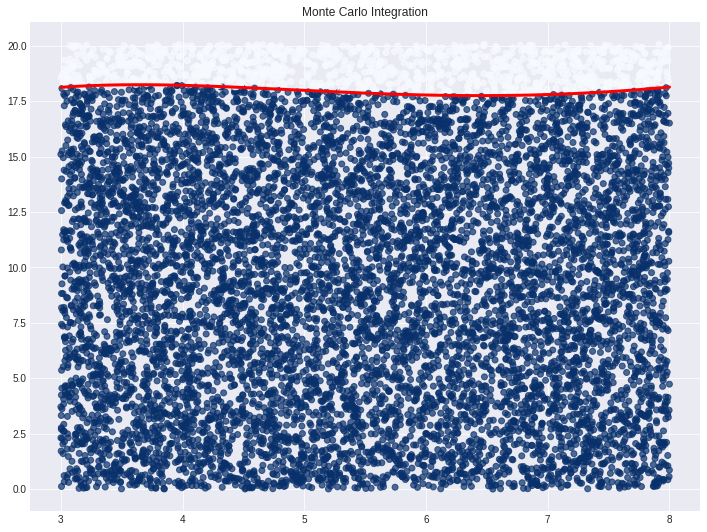

In [ ]:
n = 10000;
print('\n Question 1.1');
q11 = MC_integration(function_x, n, 3, 8, visualize_results=True);
print('Area Under Curve: ', q11);


 Question 1.2
Area Under Curve:  162.20599164000012


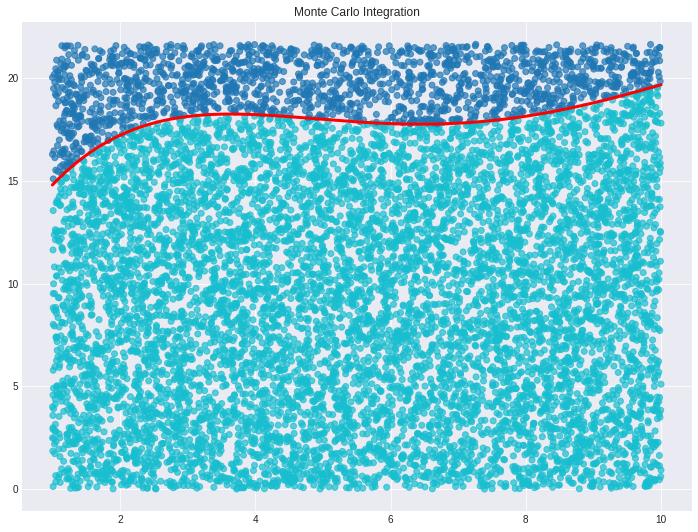

In [ ]:
print('\n Question 1.2');
q12 = MC_integration(function_x, n, 1, 10, visualize_results=True, cmap='tab10');
print ('Area Under Curve: ', q12);


 Question 1.3
Area Under Curve:  370.87093067166074


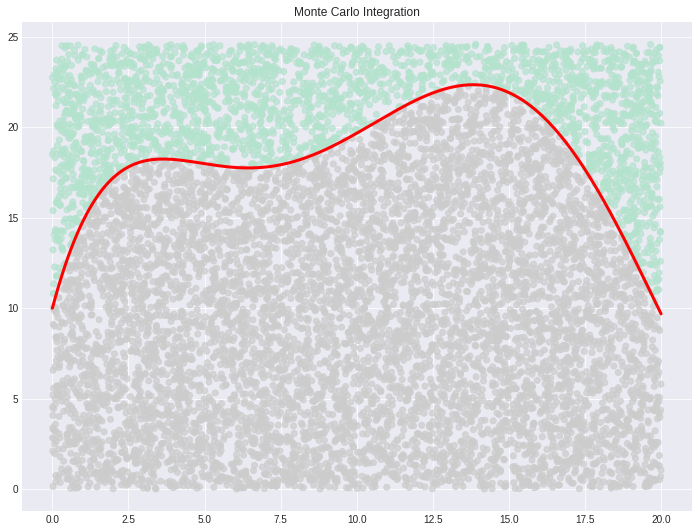

In [ ]:
print('\n Question 1.3');
q13 = MC_integration(function_x, n, 0, 20, visualize_results=True, cmap='Pastel2');
print ('Area Under Curve: ', q13);

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


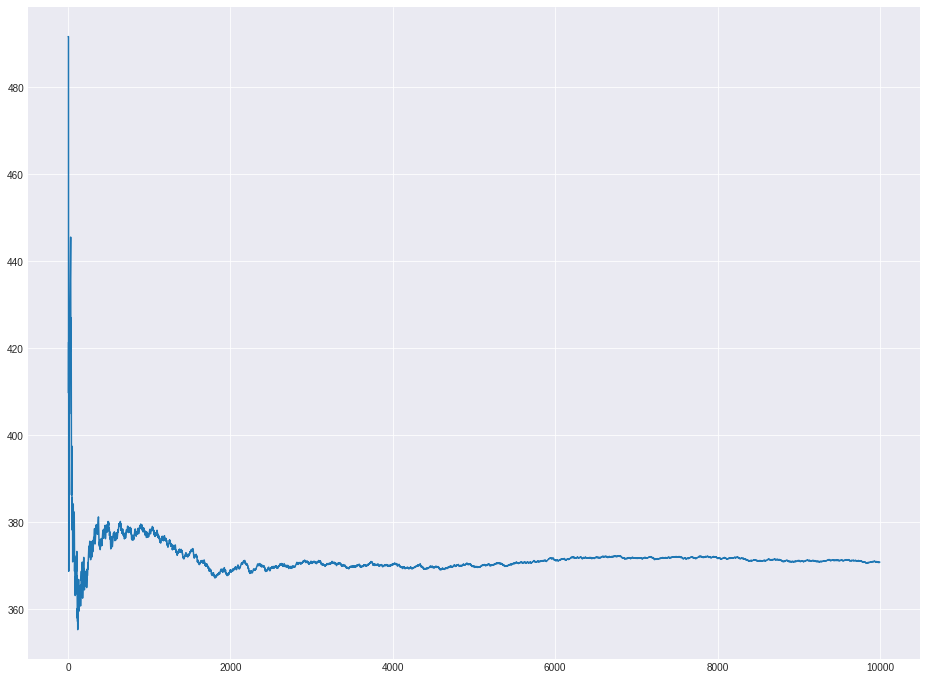

In [ ]:
plt.rcParams["figure.figsize"] = (16,12) #dimensiones del gráfico
MAX_SAMPLE = 10000 # Adjust this value as you need
x = np.arange(MAX_SAMPLE) #lista de números de muestras
'''
evaluando la integral para número de datos definidos en los elementos de x
''' 
y = [MC_integration(function_x, i, 0, 20) for i in x] 
plt.plot(x, y)
plt.show()

In [ ]:
y[MAX_SAMPLE-1]

367.9370515965161

##3. EDOs con Monte Carlo

La solución de

$$\frac{dy}{dx} = f(x)$$

$$y(0)=y_0$$
es
$$\int_{y_i}^{y_{i+1}} dy=   \int_{x_{i}}^{x_{i+1}}f(x)dx$$,

$$y_{i+1} -y_i=   \int_{x_{i}}^{x_{i+1}}f(x)dx$$,

$$y_{i+1} = y_{i} + \int_{x_{i}}^{x_{i+1}}f(x)dx$$,

where $y_{i} = f(x_{i})$ and $y_{i+1} = f(x_{i+1})$

La integral se puede aproximar usando un muestreo aleatorio como se muestra en la sección anterior:

$$y_{i+1} \sim y_{i} + \frac{x_{i+1}-x_{i}}{K}\sum_{i=1}^{K}f(x_{k})$$

, donde $x_{k}$ es elegido alateoriamente en el intervalo $x_{i}$ and $x_{i+1}.$

Como ejemplo, consideramos el problema del valor inicial:
$$\frac{dy}{dx} = e^{x}$$

$$ y_{0} = y(0)$$

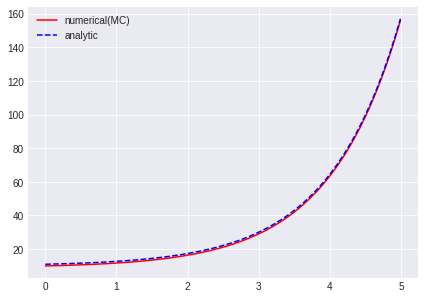

In [ ]:
K = 100 #number of samples  
n = 500 #number of points
h = 0.01 #step size
y = np.zeros(n) #valores de la función evaluados en x aleatorio
x = np.zeros(n) #Lista de números aleatorios
#condiciones iniciales
x_0 = 0  
y_0 = 10
#función
def f(x):
  return np.exp(x)

def f_a(x):
  return y_0 + np.exp(x) #solución analíticae ODE

#Condiciones iniciales
x[0] = x_0
y[0] = y_0

for i in range(n-1):
    x[i+1] = x[i] + h
    f_mean = 0
    for k in range(K):
        x_k = random.uniform(x[i],x[i+1])
        f_mean += f(x_k) 
    y[i+1] = y[i] + (h/K)*f_mean

plt.figure(figsize = (7,5)) #
plt.plot(x,y,color = 'red', label = 'numerical(MC)')    #Monte Carlo data
plt.plot(x,f_a(x),linestyle = 'dashed',color = 'blue', label = 'analytic') #Solución analítica
plt.legend(loc = 'best')

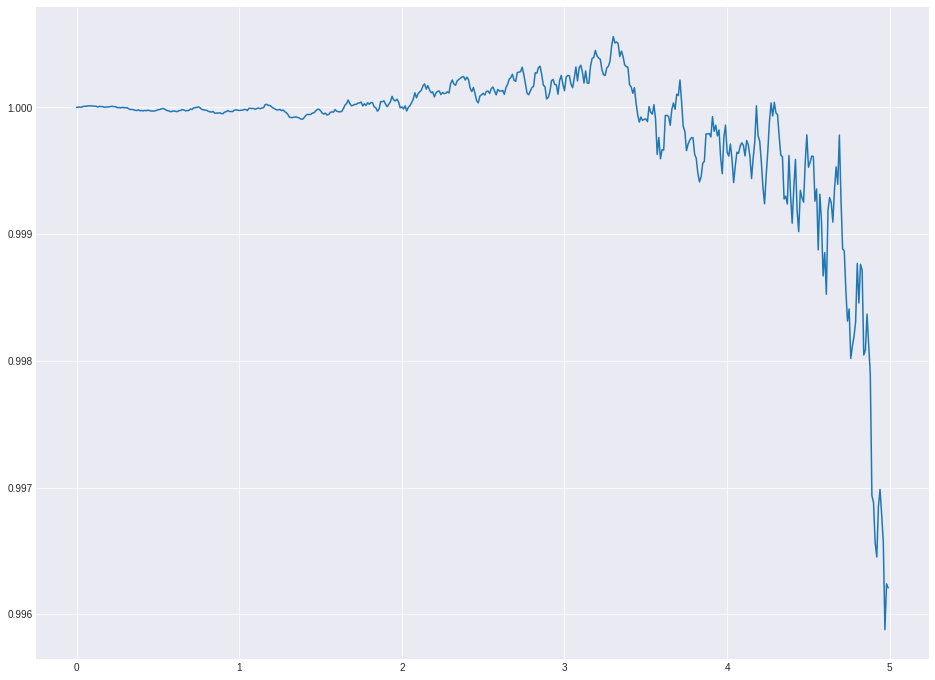

In [ ]:
plt.plot(x,(f_a(x)-y))

##4. Problema Físico

### Decaimiento radiactivo del Ra-225 a Ac-225

El Actinio-225 (Ac-225) es utilizado en medicina nuclear para el tratamiento de tumores malignos. Se puede aplicar
para producir Bismuto-213 (Bi-213) en un generador reutilizable o se puede usar solo como agente para
radioterapia, en particular para terapia alfa dirigida (TAT). No solo el Ac-225 en sí, sino también sus productos de
descomposición, emiten partículas alfa que afectan gravemente las células cancerosas en el cuerpo. Tanto pacientes
como profesionales de la salud son expuestos a la radioactividad de estos radionúclidos. Debido a ello conocer las
propiedades mediante simulaciones nos permiten conocer los límites y parámetros de radioactividad para así lograr
una mejor manipulación de elementos radiactivos.


<p align="center">
  <img src="https://habrastorage.org/webt/j5/81/7o/j5817oxe_qlm0nxasjnocq0qhbu.png"  width=35% />
</p>

Por lo que nuestro interés es la desintegración del Ra-225, el cual emite una partícula β y el núcleo hijo, Ac-225.

$$^{225}Ra  → ^{225}Ac+β      \qquad   (1)$$

### Desintegración en cadena

Conocida la ley de decaimiento (Apéndice A), se construyen las ecuaciones para una desintegración en cadena.
En la cadena de desintegración (1), el Ra-225 decrece por el decaimiento y Ac-225 crece por el decaimiento con una taza $λ_1 N_1$, de la Eq(A.1),es decir:


$$(dN_1)/dt=-λ_1 N_1  \qquad  (2) $$
$$(dN_2)/dt=λ_1 N_1-λ_2 N_2  \qquad   (3)$$

Donde $N_1$ y $N_2$ es el número de átomos de Ra-225 y Ac-225.
Siendo así las soluciones analíticas:

$$N_1 (t)=N_1^0 e^{-λ_1 t} \qquad     (4)$$

$$N_2 (t)=(λ_1/(λ_2-λ_1 ))N_1^0 (e^{-λ_1 t}-e^{-λ_2 t} )+N_2^0 e^{-λ_2 t }    \qquad   (5) $$

Donde $N_1^0$ y $N_2^0$ es el número de átomos inicial del Ra-225 y Ac-225, respectivamente.


**Monte Carlo**

En el modelo de desintegración en cadena (2) y (3), sea λ la constante de desintegración menor que la unidad, se compara λ con un número aleatorio, γ, uniformemente distribuido en el intervalo [0, 1). Si λ es mayor que γ entonces el núcleo se desintegra. Tenemos así un sistema de dos posibles resultados como se recoge en la tabla:

CONDICIÓN	RESULTADO

| Condición   |      Resultado             |
|-------------|----------------------------|
| 0≤ γ < λ    |  El núcleo se desintegra   | 
| λ≤ γ < 1    |  El núcleo no se desintegra|

*Tab.1 Condicionales de desintegración*


En la rutina principal, se compara el número aleatorio devuelto (γ) con la constante de desintegración (λ), para cada uno de los núcleos (N) radiactivos existentes en ese instante.

El bucle se ejecuta tantas veces como núcleos radiactivos haya presentes. En la unidad de tiempo, que es lo que tarda en ejecutarse el bucle, se desintegrarán un número de núcleos N1 proporcional a N; a su vez, cada núcleo se desintegra con una probabilidad λ. El número de núcleos sin desintegrar habrá disminuido en N1 núcleos. Al disminuir N, el bucle “for” se ejecutará un número cada vez menor de veces, lo que nos indica que la velocidad de desintegración disminuye con el número de núcleos radiactivos presentes.

Los parámetros requeridos en el algoritmo de Montecarlo, son:

N0: número de átomos iniciales

T1: tiempo total de integración

n_timepoints: el número de puntos aleatorios generados



**MÉTODO NUMÉRICO**

Utilizamos las ecuaciones (2) y (3), en la forma matricial:

$$\frac{d}{dt} \begin{pmatrix} N_1 \\ N_2\end{pmatrix}=\begin{pmatrix}-1/τ_1 & 0\\\ 1/τ_1 & 1/τ_2\end{pmatrix}\begin{pmatrix} N_1 \\ N_2\end{pmatrix}  \qquad (6)$$


Resolvemos la ecuación diferencia matricial de primer orden utilizando el módulo integrate.odeint de SciPy (Scientific Python), que utiliza  el integrador: Real-Valued Variable-coefficient Ordinary Differential Equation Solver (VODE).

La implementación de este algoritmo requiere de los siguientes parámetros: 

F: Parte derecha de la ecuación (6)

N0: número de átomos de Ra-225 iniciales

Timebase: arreglo de tiempos a ejecutar


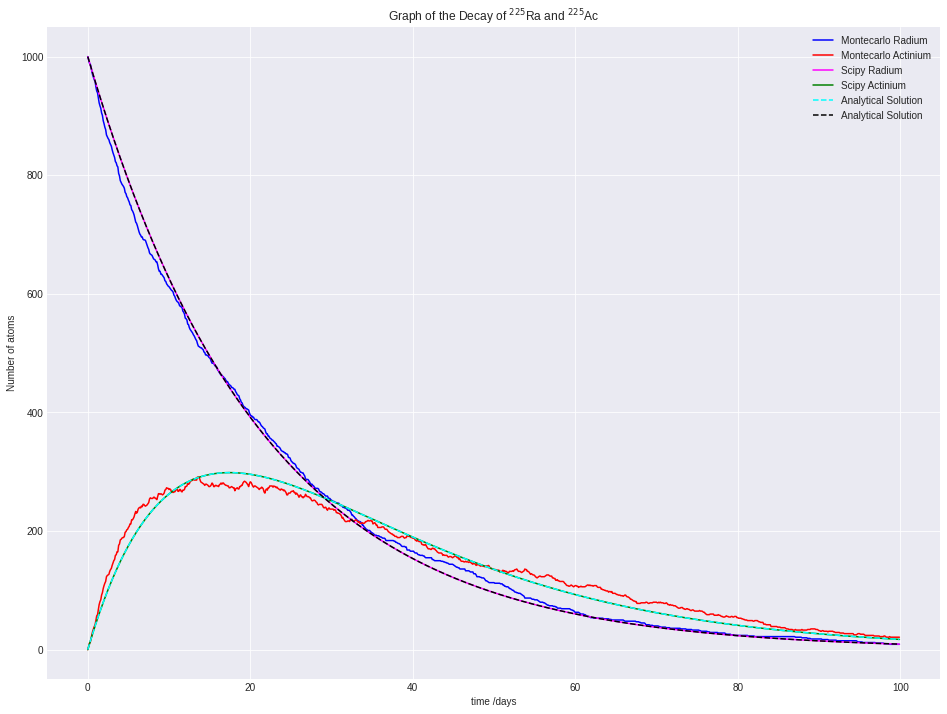

In [ ]:
random.seed(1)
#tiempo de vida media
t_half_rad   = 14.8 
t_half_act   = 10.0
#número de átomos iniciales del radón
N0           = 1000
t1           = 100
n_timepoints = 1000 # PARA EL MÉTODO NUMÉRICO
#número de átomos iniciales del radón
N0_rad = 1000 
N0_act = 0

#soluciones analíticas (Eq. 4,5)
def analytic_rad(N0, timebase):
    return N0 * np.exp (-timebase /t_half_rad * np.log(2))
    
def analytic_ac(N0_act, timebase):
    
    λ1= np.log(2)/t_half_rad
    λ2= np.log(2)/t_half_act
    return((λ1/(λ2-λ1))*N0_rad *( np.exp(-timebase*λ1)  -np.exp(-timebase*λ2))+ N0_act*np.exp(-timebase*λ2))
    
#Monte Carlo
def simulate_monte_carlo(0N, t1, n_timepoints):
    
    dt             = t1 / n_timepoints
    #Arreglos a rellenar
    count_radium   = np.zeros((n_timepoints)) 
    count_actinium = np.zeros((n_timepoints))
    count_beta     = np.zeros((n_timepoints))
    rand_numb      = np.zeros((n_timepoints))
    atoms          = np.ones((N0))

    #Probabilidades dadas en las tablas
    p_decay_rad    = 1 - np.exp(-dt / t_half_rad * np.log(2))
    p_decay_act    = 1 - np.exp(-dt / t_half_act * np.log(2))

    for idx_time in range(n_timepoints):
        #conteo de átomos
        count_radium[idx_time]   = (atoms == 1).sum() 
        count_actinium[idx_time] = (atoms == 2).sum()
        count_beta[idx_time] =(atoms==3).sum()

        for idx_atom in range(N0):
            #Condicionales de la tabla
            if atoms[idx_atom] == 1: 
                a=random.random()
                if a <= p_decay_rad: 
                    atoms[idx_atom] = 2
                else:
                    atoms[idx_atom] = 1
            elif atoms[idx_atom] == 2:
                b=random.random()
                if b <= p_decay_act:
                    atoms[idx_atom] = 3
                else:
                    atoms[idx_atom] = 2
                
    return count_radium, count_actinium,atoms,p_decay_rad,p_decay_act, count_beta

#tiempo de integración y soluciones analíticas
timebase = np.arange(0, t1, t1/n_timepoints) #creating the array of times for use in the analytic solution and scipy
n_analytic_ra = analytic_rad(N0,  timebase) #Calling the analytic solution
n_analytic_ac = analytic_ac(0,  timebase) #Calling the analytic solution

#extrayendo los datos luego de ejecutar la simulación
n_rad, n_act,atoms,p_decay_rad,p_decay_act,n_beta = simulate_monte_carlo(N0,  t1, n_timepoints) #Calling the Monte Carlo Simulation   

#Definiendo la EDO matricial
def f(N, t):
    
    N_rad, N_act = N 
    tau_rad = t_half_rad / np.log(2)
    tau_act = t_half_act / np.log(2)
    DEQ_rad = - N_rad / tau_rad
    DEQ_act = - N_act / tau_act + N_rad / tau_rad
    
    return np.array((DEQ_rad, DEQ_act))

N0 = np.array((N0_rad, N0_act))
n_scipy = scipy.integrate.odeint(f, N0, timebase) #integrando con SciPy la EDO matricial

plt.rcParams["figure.figsize"] = (16,12)

plt.figure() #Plotting code
plt.plot(timebase, n_rad, label = 'Montecarlo Radium', color = 'blue')
plt.plot(timebase, n_act, label = 'Montecarlo Actinium', color = 'red')
plt.plot(timebase, n_scipy[:,0], label = 'Scipy Radium', color = 'magenta')
plt.plot(timebase, n_scipy[:,1], label = 'Scipy Actinium', color = 'green')
plt.plot(timebase,n_analytic_ac, label = 'Analytical Solution', color = 'cyan', linestyle = '--')
plt.plot(timebase, n_analytic_ra, label = 'Analytical Solution', color = 'black', linestyle = '--')
plt.title('Graph of the Decay of $^{225}$Ra and $^{225}$Ac')
plt.ylabel('Number of atoms')
plt.xlabel('time /days')
plt.legend(loc='upper right') 
plt.show()
#plt.savefig('Ra-225yAc-225')

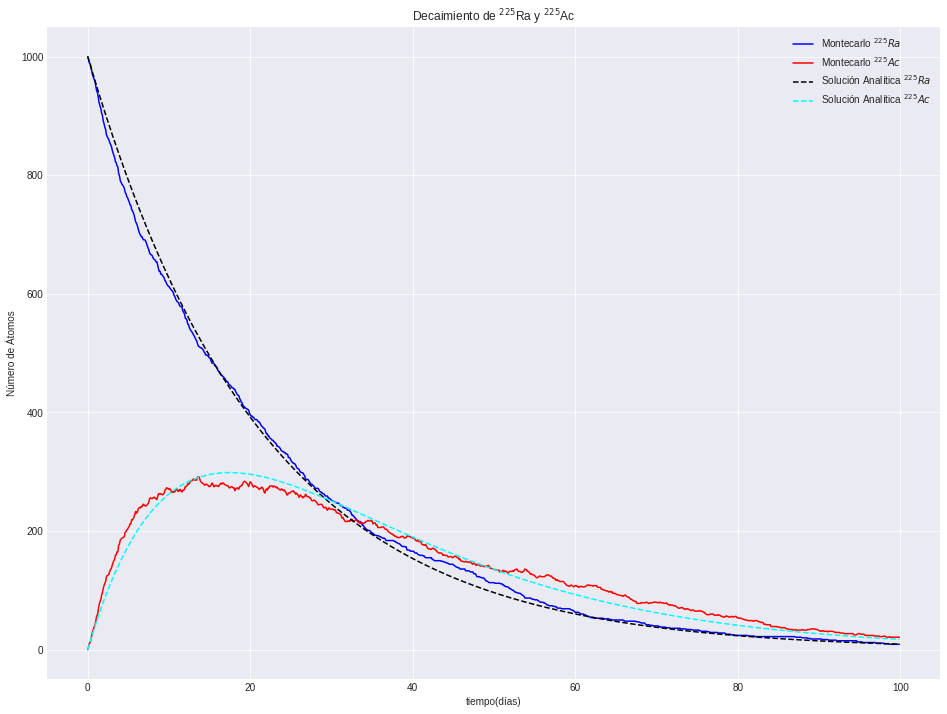

In [ ]:
plt.plot(timebase, n_rad, label = 'Montecarlo $^{225}Ra$', color = 'blue')
plt.plot(timebase, n_act, label = 'Montecarlo $^{225}Ac$', color = 'red')
plt.plot(timebase, n_analytic_ra, label = 'Solución Analítica $^{225}Ra$', color = 'black', linestyle = '--')
plt.plot(timebase,n_analytic_ac, label = 'Solución Analítica $^{225}Ac$', color = 'cyan', linestyle = '--')
plt.title('Decaimiento de $^{225}$Ra y $^{225}$Ac')
plt.ylabel('Número de Átomos')
plt.xlabel('tiempo(días)')
plt.legend(loc='upper right') 

**ERRORES RELATIVOS**

Luego de calcular la cantidad de átomos por cada método, analizamos los errores, utilizando la siguiente fórmula:

$$e_{relativo}= \frac{|Y-Y^*|}{Y} \qquad      (7)$$

Donde:

Y: Solución analítica

$Y^*$: Aproximación 


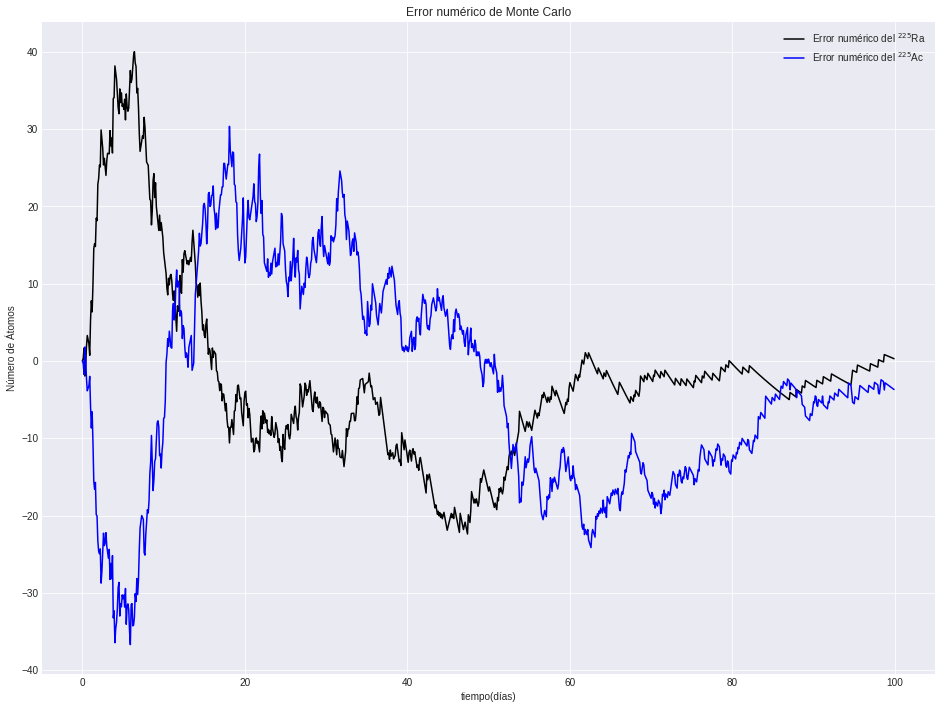

In [ ]:
plt.plot(timebase, n_analytic_ra-n_rad, label = 'Error numérico del $^{225}$Ra', color = 'black')#, linestyle = '--')
plt.plot(timebase,n_analytic_ac-n_act, label = 'Error numérico del $^{225}$Ac', color = 'blue')#, linestyle = '--')
plt.title('Error numérico de Monte Carlo')
plt.ylabel('Número de Átomos')
plt.xlabel('tiempo(días)')
plt.legend(loc='upper right') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


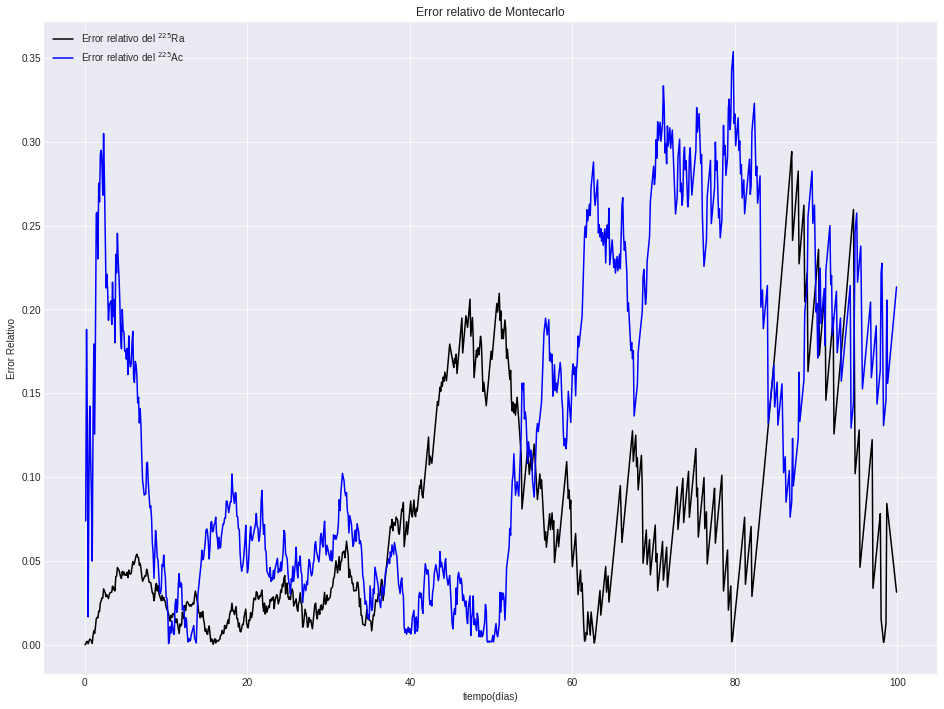

In [ ]:
plt.plot(timebase, np.abs((n_analytic_ra-n_rad)/n_analytic_ra), label = 'Error relativo del $^{225}$Ra', color = 'black')#, linestyle = '--')
plt.plot(timebase,np.abs((n_analytic_ac-n_act)/n_analytic_ac), label = 'Error relativo del $^{225}$Ac', color = 'blue')#, linestyle = '--')
plt.title('Error relativo de Montecarlo')
plt.ylabel('Error Relativo')
plt.xlabel('tiempo(días)')
plt.legend(loc='upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


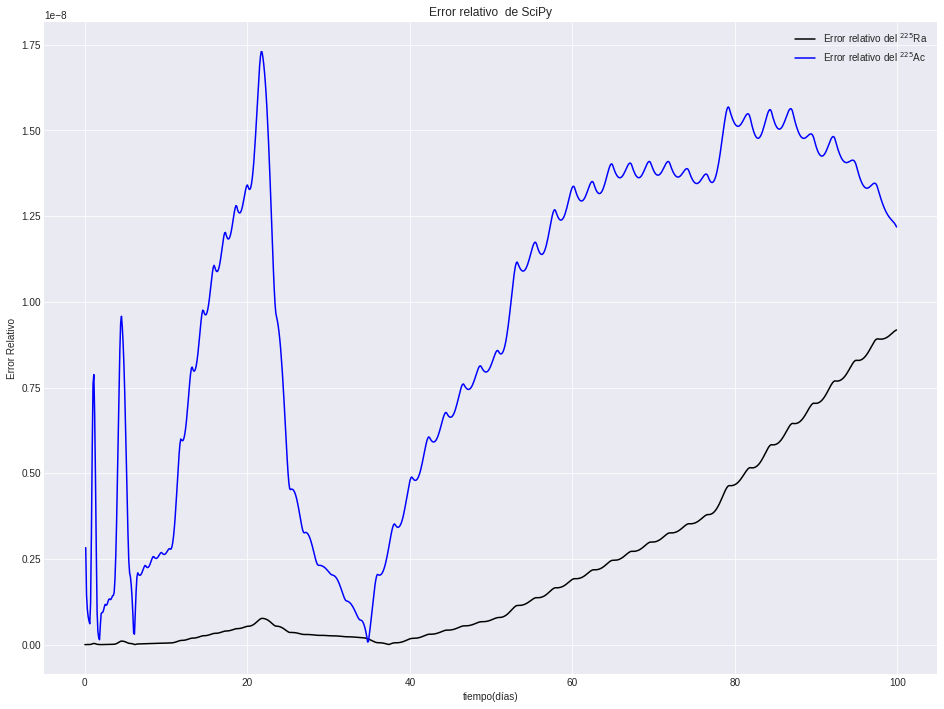

In [ ]:
plt.plot(timebase, np.abs((n_analytic_ra-n_scipy[:,0])/n_analytic_ra), label = 'Error relativo del $^{225}$Ra', color = 'black')#, linestyle = '--')
plt.plot(timebase,np.abs((n_analytic_ac-n_scipy[:,1])/n_analytic_ac), label = 'Error relativo del $^{225}$Ac', color = 'blue')#, linestyle = '--')
plt.title('Error relativo  de SciPy')
plt.ylabel('Error Relativo')
plt.xlabel('tiempo(días)')
plt.legend(loc='upper right') 

**CONCLUSIONES**

Las técnicas utilizadas son de amplio uso en el campo de la física nuclear, los modelos básicos implementados nos brindan información sobre la desintegración de un átomo en cualquier tiempo.  

Para el método de Montecarlo :


*	Ra-225: Obtenemos un error relativo máximo y mínimo de $2.9416 x10^{-1}$ y $2.573 x10^{-3}$ , respectivamente.

*	Ac-225: Obtenemos un error relativo máximo y mínimo de $3.5376x10^{-1}$ y $6x10^{-4}$, respectivamente.

Para el método de VODE:

*	Ra-225: Obtenemos un error relativo máximo y mínimo de $9.1789x10^{-9}$ y $9.3722x10^{-13}$, respectivamente.

*	Ac-225: Obtenemos un error relativo máximo y mínimo de $1.7298x10^{-8}$ y $7.6963x10^{-11}$, respectivamente.

Los valores mínimos para el caso del Actinio fueron tomados luego del primer paso, debido a que la cantidad de átomos inicial de Actinio es 0, lo cual invalida la ecuación (7).

La aproximación mediante el método Montecarlo viene siendo la menos precisa, debido a que este requiere de una gran cantidad de números aleatorios, por lo que se requiere de mayor tiempo y cómputo.

La aproximación de VODE nos da un resultado más preciso, con el mismo número de datos que el método de Montecarlo, siendo el error máximo de un orden de $10^{-8}$.

Sin embargo, los resultados son de mucha importancia cuando se tiene que incrementar la complejidad de los algoritmos y no se tengan soluciones analíticas, ya que el modelo básico es el que será de utilidad para calibrar modelos más complejos.

### APÉNDICE A

A. LEY DE DECAIMIENTO
      El decaimiento radiactivo es independiente del modo de decaimiento, y se aplica a: partículas α, β+, β-,γ, captura electrónica y fisión espontánea.

La probabilidad de que un átomo decaiga es λdt, entonces el incremento negativo de átomos en un tiempo dt está dado por:

$$-dN=Nλdt   \qquad Eq.(A.1)$$

Integrando la ecuación Eq.(A.1), Obtenemos que para N átomos, la probabilidad de no decaimiento es:

$$N(t)=N(0) e^{-λt}   \qquad   Eq.(A.2)$$

Además se definen, el periodo de semidesintegración ($τ_{1/2}$) y el tiempo de vida media(τ). El  $τ_{1/2}$  , como el tiempo que tarda, en promedio, una sustancia radioactiva pura en reducir sus átomos a la mitad del valor inicial. Reemplazando $τ_{1/2}$ en la ecuación Eq.(A.2)

$$N(0)/2=N(0) e^{-λτ_{1/2}}    \qquad  Eq.(A.3)$$

Despejando la ecuación Eq.(A.3), obtenemos:

$$τ_{1/2}=ln⁡(2)/λ    \qquad  Eq.(A.4)$$

Y definiendo τ, como:

$$τ=λ^{-1}   \qquad  Eq.(A.5)$$

Es el tiempo necesario para que los átomos se reduzcan a 1/e de la cantidad inicial.


## 5. Resumen

*   Es un método directo y flexible.
*   Existe un amplio abanico de programas y lenguajes destinados a simular.
*   Cuando el modelo matemático es demasiado complicado la simulación permite obtener una aproximación.
La simulación nos permite formular condiciones extremas con riesgos nulos.
*  La simulación no interfiere con el mundo real. Permite experimentar.
*  Permite estudiar la interacción entre las diferentes variables del problema.
*  Mediante la simulación podemos “influir en el tiempo” de los procesos.
*  La simulación permite resolver problemas que no tienen solución analítica.
*  Una buena simulación puede resultar muy complicada, gran número de variables.
*  La simulación no genera soluciones Optimas globales. 
*  Cada simulación es única, interviene el azar.


## 6. Recursos útiles
* [Integración por Monte Carlo](https://github.com/ZachWolpe/Monte-Carlo-Integration/blob/master/%20Monte%20Carlo%20Integration.ipynb)
["Ventajas y Desventajas de Monte Carlo"](https://modeladoysimulaciondesistemas.wordpress.com/2016/10/23/modelo-monte-carlos/)
* ["Lista de tuplas"](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists)
* ["SciPy integrate documentation"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
* Eric Ayars , 'Computational Physics with Python" (libro completo [aquí](https://belglas.files.wordpress.com/2018/03/cpwp.pdf))
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))
* `scipy.integrate.odeint`, [scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

* James E. Turner.  Atoms, Radiation, and Radiation Protection, Third Edition, 2007
* W. B. Bonnor. Gravitational Radiation. Nature  181, 1196-1197, 1958
* Rose Boll, Saed Mizadeh, Production of Actinium-225 for alpha particle mediated radioimmunotheraphy. Applied Radiation and Isotopes 2005; 667-679 
* (SciPy Alogrithm) Peter N. Brown, et.al. VODE: A Variable-coefficient ODE Solver, SIAM J. Sci. Stat. Comput. Vol.10 (1989); 1038-1051


## 7. Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>